In [1]:
did = False
if not did:
    %cd ..
    did = True

/Users/adsurbum/projects/univer/EffectiveNPI/src


In [350]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [351]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [427]:
import os,fnmatch

def calc_stats(countries,dir_name,zeros):
    dic_arr = []
    loglik_arr = []
    lnprobs = []
    for country_name in countries:
        load_data(dir_name+country_name+'.npz',country_name)
        dic_arr.append(calc_DIC())
        loglik_arr.append(calc_LoglikMAP(zeros))
        lnprobs.append(logliks.mean())
    return dic_arr,loglik_arr,lnprobs

def plot_diff(countries,arr1,arr2,label, model_r, model_l):
    dic_diff = np.array(round_list(np.array(arr1)-np.array(arr2)))
    countries = np.array(countries)
    s = dic_diff.argsort()
    dic_diff = dic_diff[s]
    countries = countries[s]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(dic_diff,countries,'ok');
    ax.plot(dic_diff[dic_diff>=6],countries[dic_diff>=6],'ok',color='red');
    ax.plot(dic_diff[dic_diff<=-6],countries[dic_diff<=-6],'ok',color='blue');
    ax.hlines(countries[dic_diff<0],dic_diff[dic_diff<0],0,color='blue')
    ax.hlines(countries[dic_diff>=0],dic_diff[dic_diff>=0],0,color='red')
    ax.set(
        xlabel=label+'\n\n'+'{} --> \n\n <-- {}'.format(model_r,model_l),
    )
    plt.axvline(0, ls='--', color='k')
    sns.despine()
    plt.tight_layout()
    return list(zip(countries,dic_diff))

def arrow_up():
    ax = plt.gca()
    ax.annotate('', xy=(-0.5, ax.get_ylim()[0]*0.4),xytext=(-0.5,ax.get_ylim()[0]*0.5),     
            arrowprops=dict(color='purple', width=0.5,headlength=10,headwidth=10),
            annotation_clip=False) 
def arrow_down():
    ax = plt.gca()
    ax.annotate('', xy=(-0.5, ax.get_ylim()[0]*0.5),xytext=(-0.5,ax.get_ylim()[0]*0.4),     
            arrowprops=dict(color='purple', width=0.5,headlength=10,headwidth=10),
            annotation_clip=False) 
def round_list(lst):
    return [round(v,1) for v in lst]
def print_stats(countries, lst, idx):
    return list(zip(countries, *[round_list(v[idx]) for v in lst]))

In [353]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-15-uniform')
countries = [a[:-4] for a in fnmatch.filter(os.listdir(dir_name), '*.npz')]

In [354]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-5-uniform')
zero5 = calc_stats(countries,dir_name,5)

CPU times: user 9.13 s, sys: 1.94 s, total: 11.1 s
Wall time: 12 s


In [355]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-10-uniform')
zero10 = calc_stats(countries,dir_name,10)
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-15-uniform')
zero15 = calc_stats(countries,dir_name,15)
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
zero1 = calc_stats(countries,dir_name,1)

CPU times: user 31.6 s, sys: 7.49 s, total: 39.1 s
Wall time: 41.8 s


DIC from zero1 to zero15 (lower is better) zero 15 is the best


[('Sweden', 30.0, 34.1, 40.6, 45.8),
 ('Belgium', 31.9, 35.0, 39.8, 44.3),
 ('United_Kingdom', 39.6, 45.1, 52.1, 51.8),
 ('Switzerland', 80.0, 112.8, 133.3, 1984.8),
 ('Germany', 210.8, 302.3, 442.6, 532.0),
 ('Austria', 32.9, 36.8, 51.6, 70.2),
 ('Spain', 81.3, 162.0, 183.3, 203.4),
 ('France', 53.8, 78.4, 102.9, 141.1),
 ('Italy', 254.1, 368.6, 506.3, 565.7),
 ('Denmark', 46.1, 54.3, 53.0, 83.7),
 ('Norway', 38.3, 47.8, 46.0, 57.1)]

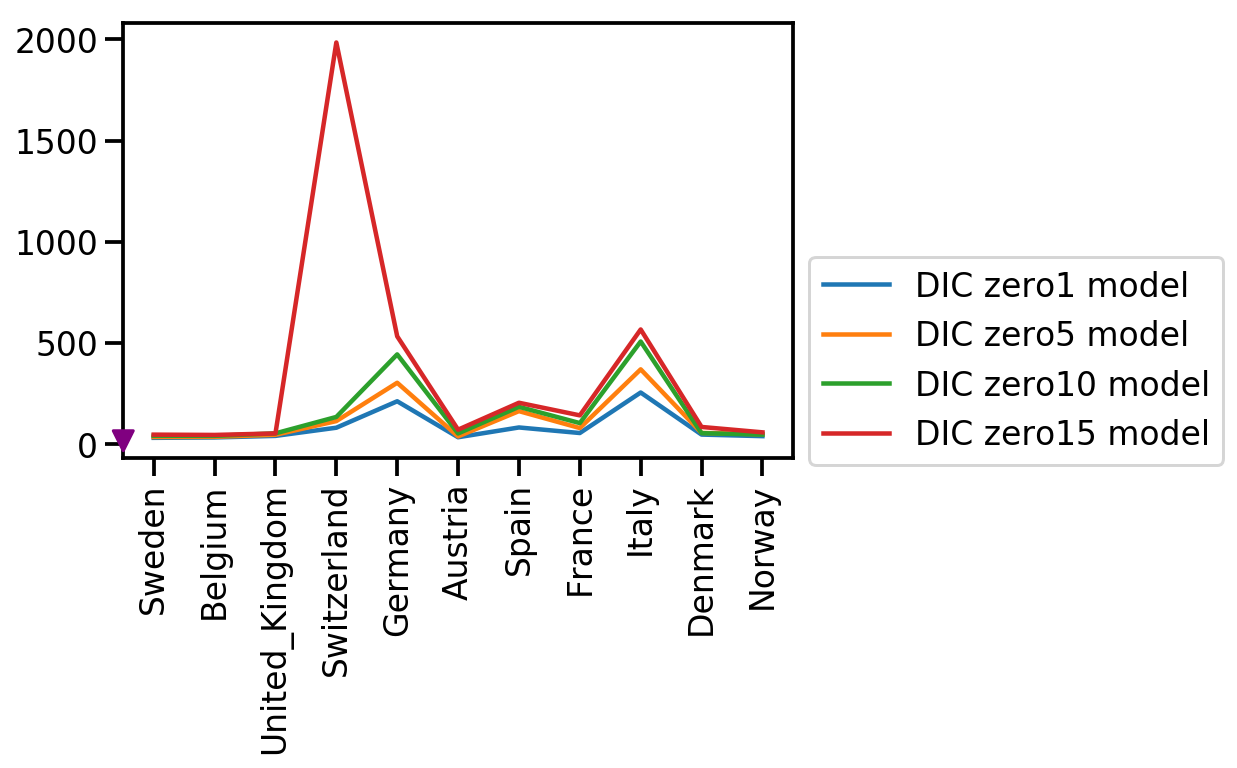

In [360]:
import matplotlib.pyplot as plt
plt.plot(zero1[0],label='DIC zero1 model')
plt.plot(zero5[0],label='DIC zero5 model')
plt.plot(zero10[0],label='DIC zero10 model')
plt.plot(zero15[0],label='DIC zero15 model')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
arrow_down()
print('DIC from zero1 to zero15 (lower is better) zero 15 is the best')
print_stats(countries, [zero1,zero5, zero10, zero15], 0)

loglik_E from zero1 to zero15 (higher is better) zero1 is the best


[('Sweden', -7.0, -7.6, -8.4, -8.4),
 ('Belgium', -11.0, -11.8, -12.1, -12.1),
 ('United_Kingdom', -13.4, -13.5, -15.0, -15.0),
 ('Switzerland', -29.7, -31.4, -32.0, -34.0),
 ('Germany', -75.3, -75.2, -93.3, -100.0),
 ('Austria', -9.6, -9.9, -10.9, -11.2),
 ('Spain', -26.2, -26.4, -27.7, -27.3),
 ('France', -20.4, -20.6, -21.2, -22.3),
 ('Italy', -111.5, -115.9, -119.4, -120.7),
 ('Denmark', -12.1, -13.5, -13.6, -14.5),
 ('Norway', -12.0, -12.3, -13.8, -13.8)]

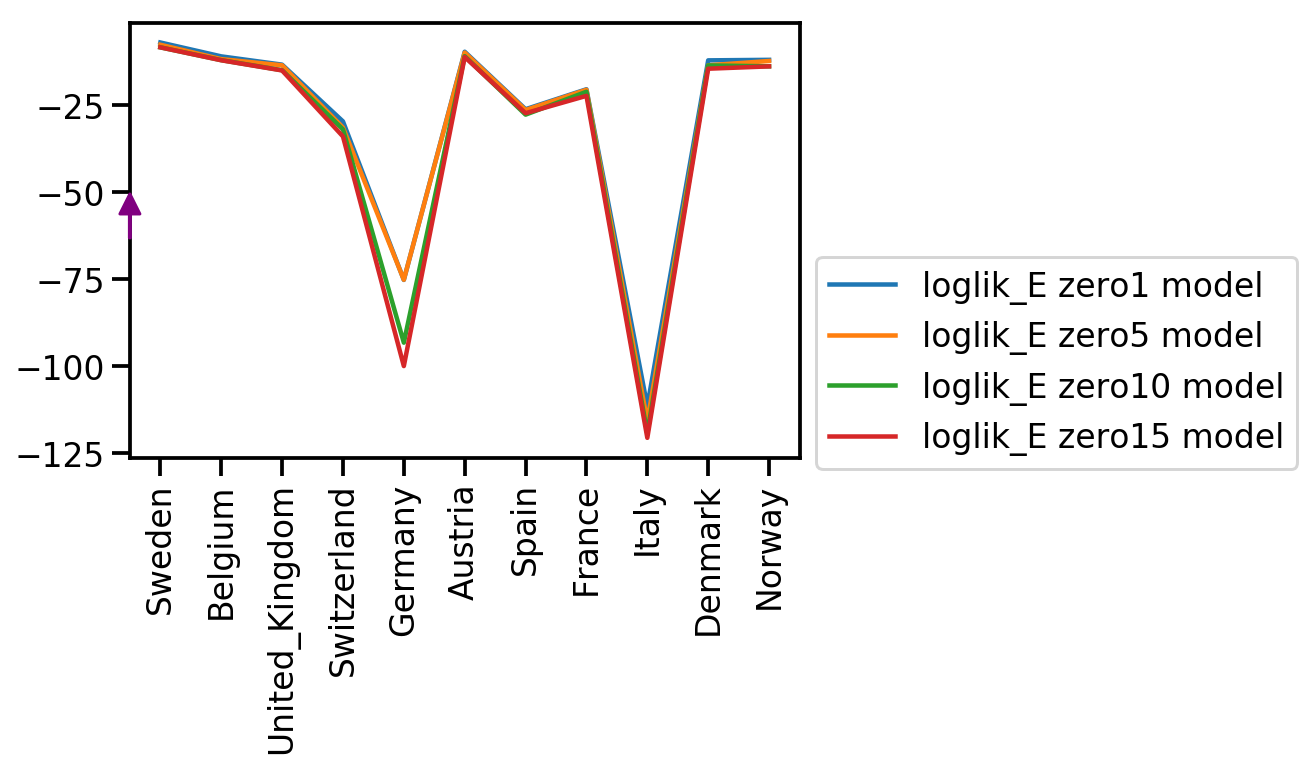

In [361]:
import matplotlib.pyplot as plt
plt.plot(zero1[1],label='loglik_E zero1 model')
plt.plot(zero5[1],label='loglik_E zero5 model')
plt.plot(zero10[1],label='loglik_E zero10 model')
plt.plot(zero15[1],label='loglik_E zero15 model')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
arrow_up()
print('loglik_E from zero1 to zero15 (higher is better) zero1 is the best')
print_stats(countries, [zero1, zero5, zero10, zero15], 1)

loglik_E from zero1 to zero15 (higher is better) zero1 is the best


[('Sweden', -11.0, -12.0, -13.6, -14.5),
 ('Belgium', -13.5, -14.1, -14.7, -15.5),
 ('United_Kingdom', -16.6, -17.4, -19.0, -18.4),
 ('Switzerland', -34.8, -42.3, -46.0, -508.6),
 ('Germany', -90.3, -109.2, -148.0, -169.6),
 ('Austria', -13.1, -13.6, -17.4, -21.8),
 ('Spain', -33.4, -52.4, -57.4, -61.1),
 ('France', -23.7, -28.9, -34.5, -43.6),
 ('Italy', -119.3, -145.4, -177.3, -189.0),
 ('Denmark', -17.6, -19.6, -18.7, -26.2),
 ('Norway', -15.6, -17.5, -17.0, -19.5)]

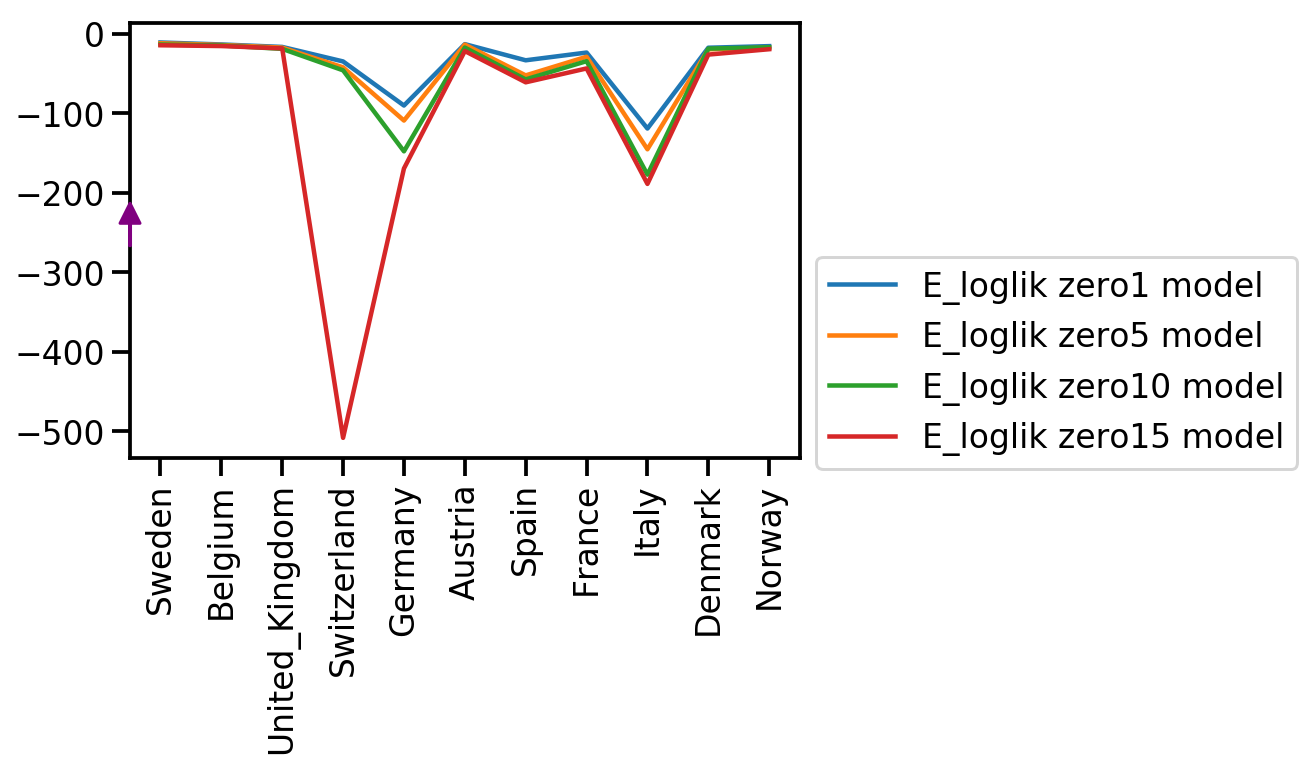

In [362]:
import matplotlib.pyplot as plt
plt.plot(zero1[2],label='E_loglik zero1 model')
plt.plot(zero5[2],label='E_loglik zero5 model')
plt.plot(zero10[2],label='E_loglik zero10 model')
plt.plot(zero15[2],label='E_loglik zero15 model')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
arrow_up()
print('loglik_E from zero1 to zero15 (higher is better) zero1 is the best')
print_stats(countries, [zero1, zero5, zero10, zero15], 2)

[('Switzerland', -140.2),
 ('Belgium', -137.6),
 ('Sweden', -24.5),
 ('United_Kingdom', -21.3),
 ('Spain', -20.5),
 ('Austria', -14.8),
 ('France', -7.0),
 ('Germany', -6.5),
 ('Italy', -4.8),
 ('Denmark', 1.3),
 ('Norway', 1.8)]

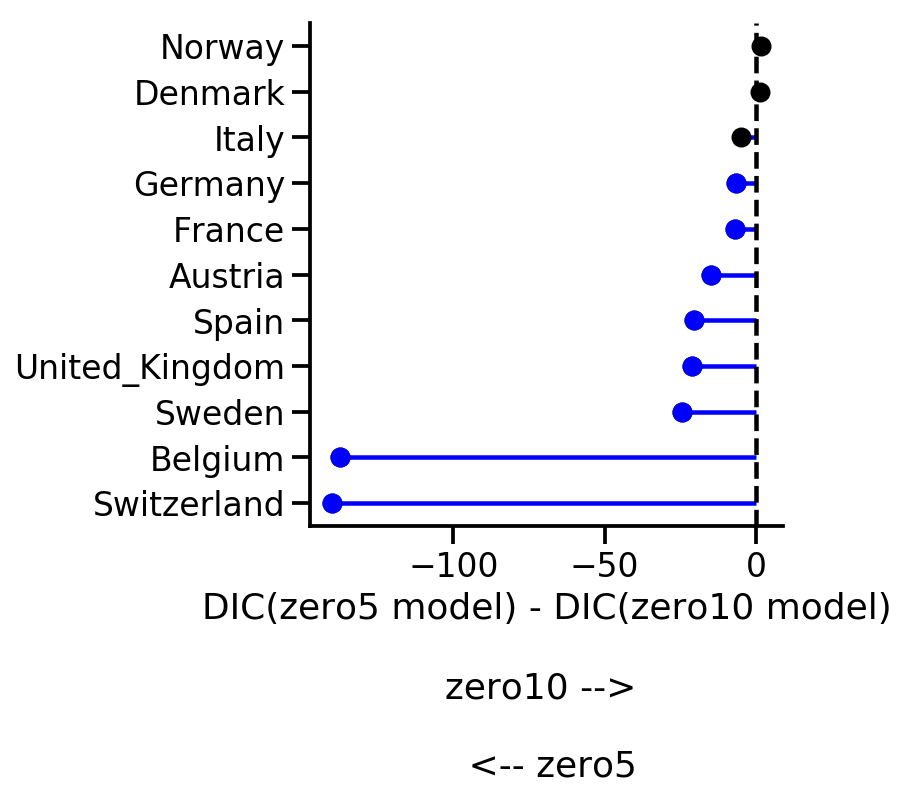

In [424]:
plot_diff(countries, zero5[0], zero10[0], 'DIC(zero5 model) - DIC(zero10 model)', 'zero10', 'zero5')

[('Denmark', 0.0),
 ('Italy', 0.3),
 ('Spain', 0.5),
 ('Sweden', 0.6),
 ('Germany', 0.8),
 ('Austria', 1.0),
 ('United_Kingdom', 1.3),
 ('France', 1.4),
 ('Norway', 1.5),
 ('Belgium', 3.4),
 ('Switzerland', 18.1)]

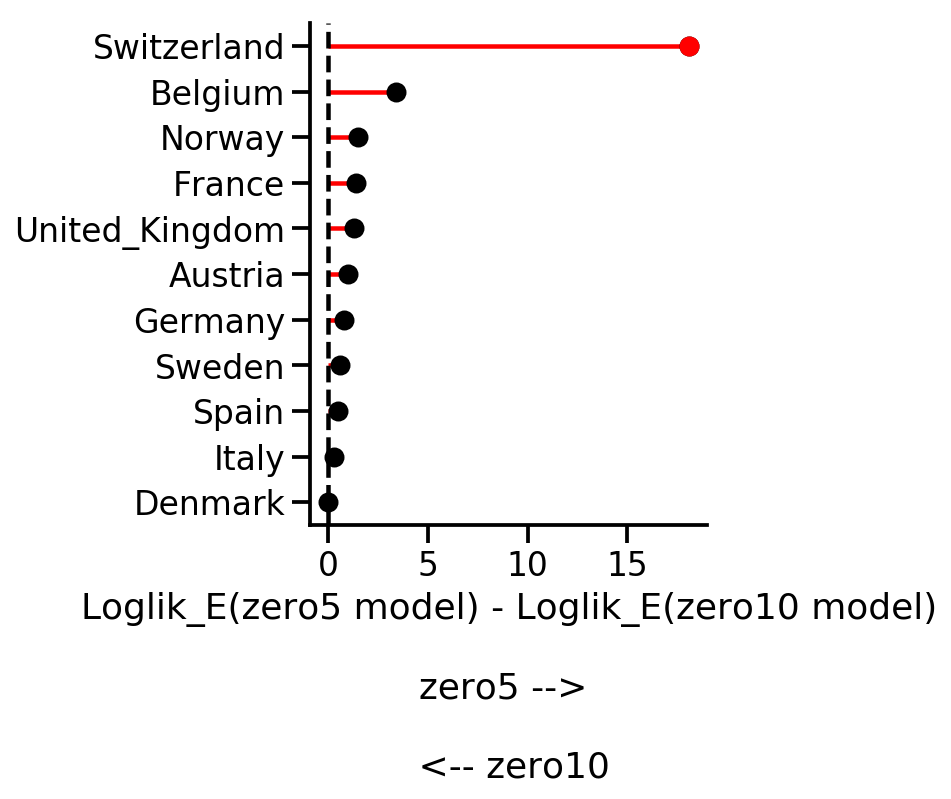

In [429]:
plot_diff(countries, zero5[1], zero10[1], 'Loglik_E(zero5 model) - Loglik_E(zero10 model)','zero5', 'zero10')

[('Denmark', -0.9),
 ('Norway', -0.4),
 ('Italy', 0.6),
 ('Germany', 1.6),
 ('France', 1.6),
 ('Spain', 3.7),
 ('Austria', 3.7),
 ('United_Kingdom', 5.0),
 ('Sweden', 5.6),
 ('Belgium', 31.9),
 ('Switzerland', 38.7)]

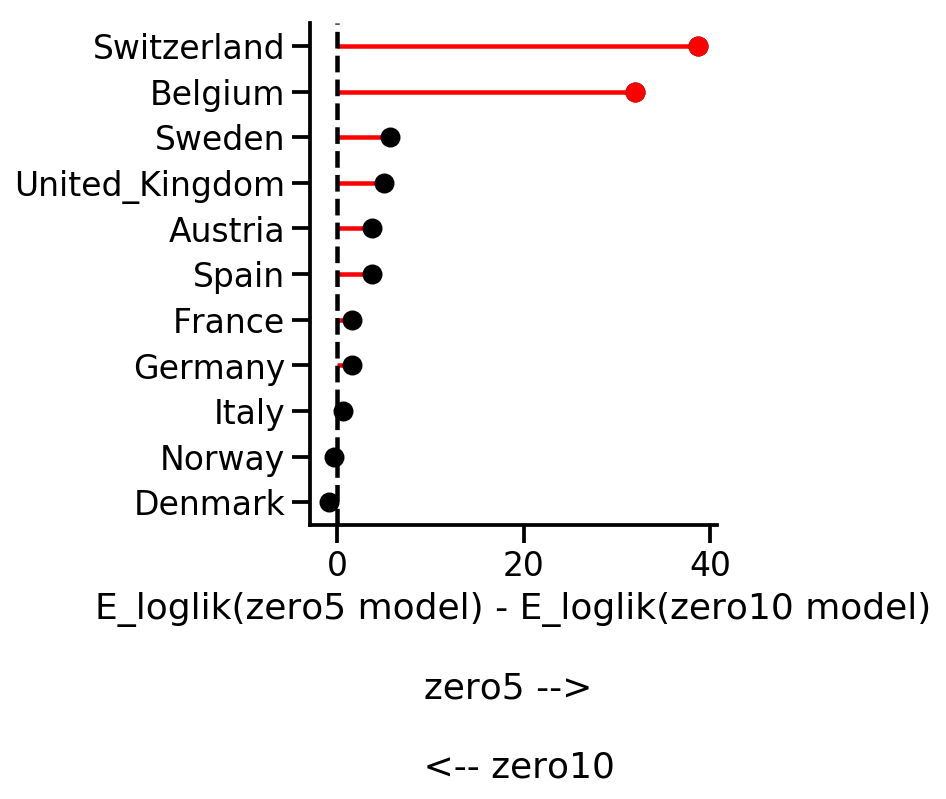

In [430]:
plot_diff(countries, zero5[2], zero10[2], 'E_loglik(zero5 model) - E_loglik(zero10 model)','zero5', 'zero10')

1 zero


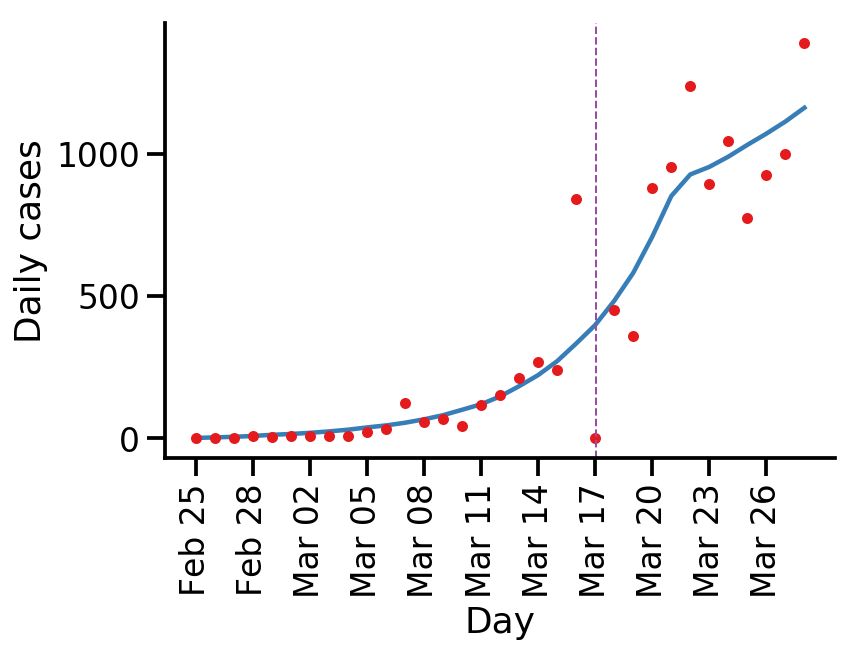

In [435]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Switzerland'+'.npz','Switzerland')
ax = plot_incidences();
print('1 zero')

10 zero


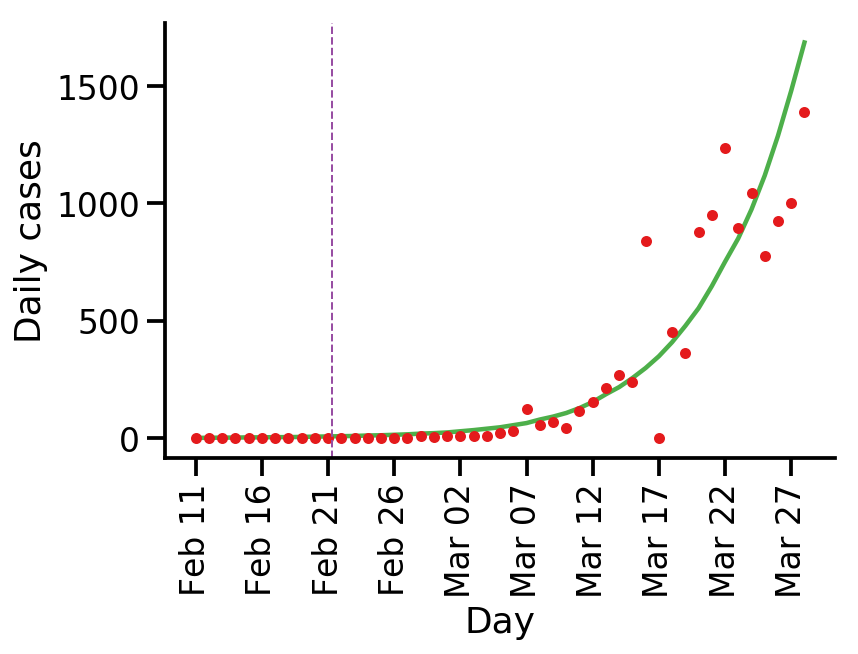

In [436]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-15-uniform')
load_data(dir_name+'Switzerland'+'.npz','Switzerland')
plot_incidences(ax,color=green)
print('10 zero')

In [117]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Spain'+'.npz','United K')
ax = plot_incidences()
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-15-uniform')
load_data(dir_name+'Spain'+'.npz','Spain')
plot_incidences(ax,color=green)

KeyError: 'United K'